In [131]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [132]:
path = 'C:/Users/nguye/OneDrive/Tài liệu/Sales2019/'
df = []
for filename in os.listdir(path):
    if filename.endswith("csv"):
        df1 = pd.read_csv(path + filename)
        df.append(df1)
data = pd.concat(df,axis = 0)
data['Month'] = data['Order Date'].str[:2]
data.dropna(axis = 0, how = 'any', inplace = True)
data.drop(data[data['Month'] == 'Or'].index, inplace=True)
data['Price Each'] = pd.to_numeric(data['Price Each'],downcast = 'float')
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'],downcast = 'integer')
data['Sales'] = data['Price Each']*data['Quantity Ordered']
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Hour'] = data['Order Date'].dt.hour





<AxesSubplot:xlabel='Hour', ylabel='Amount of Products'>

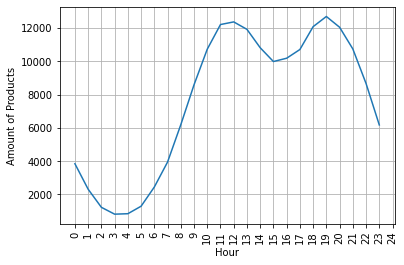

In [133]:
data_hour = data.groupby('Hour').count()['Product']
data_hour.plot.line(ylabel = 'Amount of Products', xticks = range(25), rot = 90, grid = True)

<AxesSubplot:title={'center':'Sales 2019'}, xlabel='Month', ylabel='Sales(USD)'>

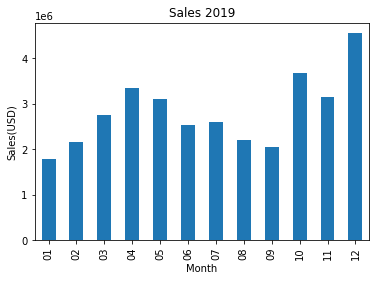

In [134]:
data_month = data.groupby(by='Month')
data_month['Sales'].sum().plot.bar(title = 'Sales 2019', ylabel = 'Sales(USD)')

'plt.bar(data_city.index,data_city[\'Sales\'])\nplt.xlabel(\'Cities\')\nplt.ylabel("Sales")\nplt.xticks(fontsize = 8 ,rotation = 90)\nplt.show()'

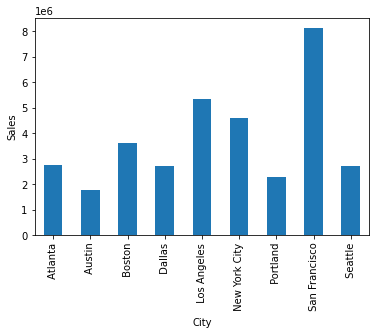

In [135]:
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1])
data_city = data.groupby(by='City')
data_city = data_city.sum()
data_city['Sales'].plot.bar(ylabel = 'Sales')
'''plt.bar(data_city.index,data_city['Sales'])
plt.xlabel('Cities')
plt.ylabel("Sales")
plt.xticks(fontsize = 8 ,rotation = 90)
plt.show()'''

In [136]:
data_duplicated = data[data['Order ID'].duplicated(keep = False)]
data_duplicated = data_duplicated.groupby('Order ID')
t = data_duplicated['Product'].apply(lambda x: ', '.join(x))
t.value_counts().head(10)

iPhone, Lightning Charging Cable                        860
Google Phone, USB-C Charging Cable                      828
iPhone, Wired Headphones                                355
Vareebadd Phone, USB-C Charging Cable                   301
Google Phone, Wired Headphones                          295
iPhone, Apple Airpods Headphones                        274
Google Phone, Bose SoundSport Headphones                160
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     74
Vareebadd Phone, Bose SoundSport Headphones              56
Name: Product, dtype: int64

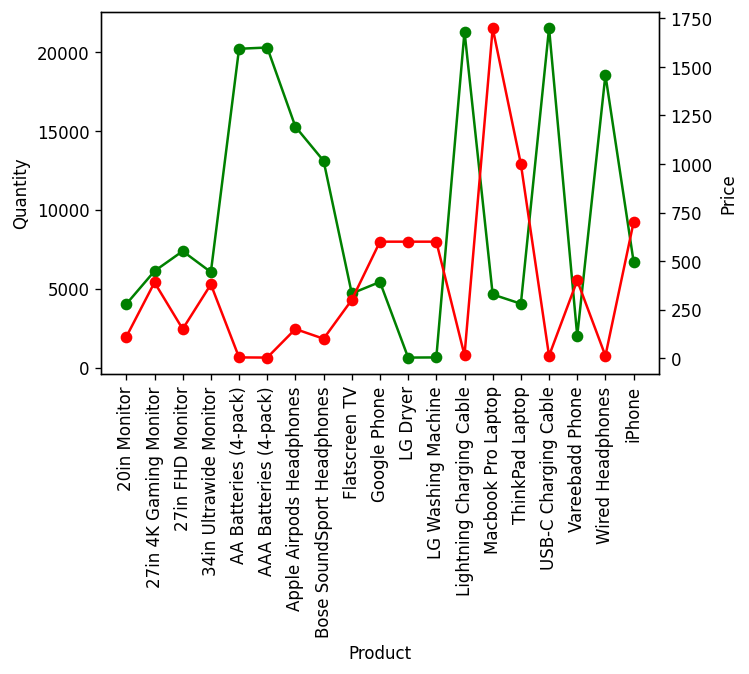

In [137]:
fig, x1 = plt.subplots(dpi = 120) 
x2 = x1.twinx()
x1.plot(data.groupby('Product')['Product'].count(), 'go-', label ='Quantity')
x1.set_xticklabels('',rotation = 90)
x1.set_xlabel('Product')
x1.set_ylabel('Quantity')
x2.plot(data.groupby('Product')['Price Each'].mean(), 'ro-', label = 'Price')
x2.set_ylabel('Price')
plt.show()